In [356]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint
from scipy.stats import rv_histogram, norm

import src
from src.reload import deep_reload

In [31]:
deep_reload(src)

arrival_rate = 1 / (10 * 60)
service_rate = 1 / (45 * 60)
servicers = 5

waiting_time = src.queuing.mmc_queue(arrival_rate, service_rate, servicers)
waiting_time

4117.463391957859

In [40]:
deep_reload(src)

rho = .5
service_rate = 1 / (45 * 60)
servicers = 5

arrival_rate = rho * servicers * service_rate

waiting_time = src.queuing.mmc_queue(arrival_rate, service_rate, servicers)
waiting_time, arrival_rate

(140.8010012515645, 0.0009259259259259259)

In [347]:
deep_reload(src)

servicers = list(range(1, 16))
rho = np.linspace(0, .99, 100)
service_rate = 1 / (45 * 60)
max_time = 2 * 3600

waiting_time = np.zeros((len(servicers), len(rho)))

for idx_0 in range(len(servicers)):
    for idx_1 in range(len(rho)):

        arrival_rate = rho[idx_1] * servicers[idx_0] * service_rate

        waiting_time[idx_0, idx_1] = src.queuing.mmc_queue(
            arrival_rate, service_rate, servicers[idx_0], max_time = max_time
        )

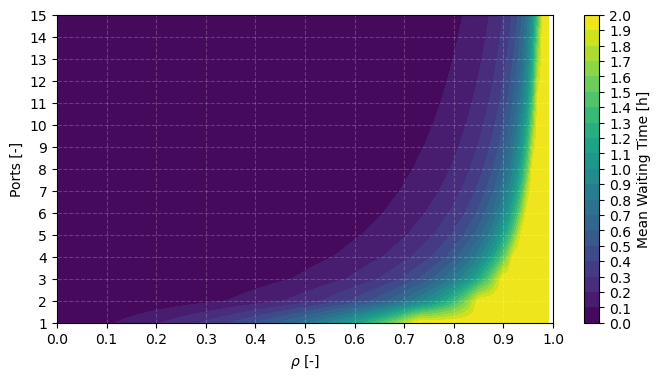

In [348]:
xg, yg = np.meshgrid(rho, servicers, indexing = 'ij')

fig, ax = plt.subplots(1, 1, figsize = (8, 4))

c = ax.contourf(
    xg, yg, waiting_time.T / 3600,
    levels = np.linspace(0, 2, 21)
)

plt.colorbar(
    ax = ax, mappable = c,
    ticks = np.linspace(0, 2, 21),
    label = 'Mean Waiting Time [h]',
    # extend = 'max',
    # extendfrac = .5,
)

kw = {
    'xticks': np.linspace(0, 1, 11),
    'yticks': servicers,
    'xlabel': r'$\rho$ [-]',
    'ylabel': 'Ports [-]',
}

_ = ax.set(**kw)

kw = {
    'ls': 'dashed',
    'color': 'w',
    'alpha': .2,
}

_ = ax.grid(**kw)

In [368]:
x = np.linspace(.01, .99, 100)
energy = np.clip(norm(45, 15).ppf(x), 0, 90)
duration = energy / 80
frequency = 1 / duration

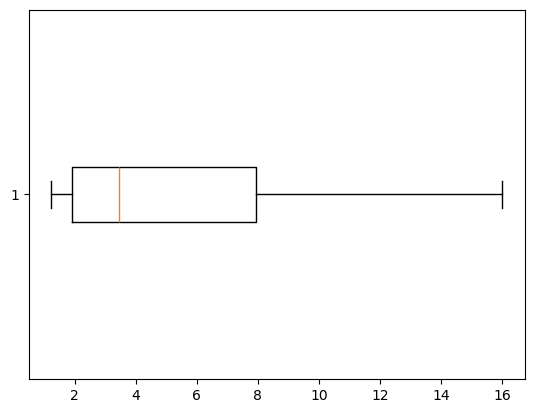

In [487]:
deep_reload(src)

seed = 579245215
# seed = None
rng = np.random.default_rng(seed)

rho = np.linspace(.66, 1, 100)

n = 1

qtd = src.queuing.queuing_time_distribution(n, rho, **kw)

_ = plt.boxplot(
    qtd.rvs(size = 1000, random_state = rng) / 3600,
    vert = False,
    showfliers = False,
)

In [488]:
20 * 3.6e6 / 550

130909.09090909091

In [496]:
550 / 3.6 * 1.609

245.81944444444443

In [495]:
.313 / 1.609 * 3.6e3

700.3107520198881

In [478]:
deep_reload(src)

rho = np.linspace(.0, .33, 100)
rho = np.linspace(.33, .66, 100)
rho = np.linspace(.66, .99, 100)
rho = np.linspace(0, 1, 100)

max_time = np.inf
servicers = list(range(1, 16))

energy = np.clip(norm(45, 15).ppf(rho), 0, np.inf)
duration = energy / 80 * 3600
service_rate = 1 / duration

waiting_time_data = np.zeros((len(servicers), len(rho)))

for idx_0 in range(len(servicers)):
    
    waiting_time = np.zeros(len(rho))
    
    for idx_1 in range(len(rho)):

        arrival_rate = rho[idx_1] * servicers[idx_0] * service_rate[idx_1]

        waiting_time[idx_1] = src.queuing.mmc_queue(
            arrival_rate, service_rate[idx_1], servicers[idx_0], max_time = max_time
        )

    waiting_time_data[idx_0] = waiting_time

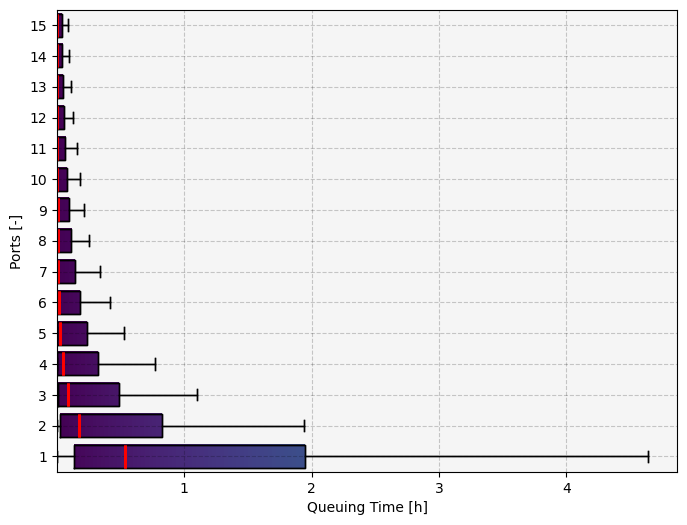

In [479]:
deep_reload(src)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

kw = {
    'vert': False,
    'showfliers': False,
    'widths': .75,
    'medianprops': {
        'lw': 2,
        'color': 'r'
    },
}

boxplots = ax.boxplot(waiting_time_data.T  / 3600, **kw)

for box in boxplots['boxes']:

    x, y = box.get_xydata().T

    gradient = np.atleast_2d(np.linspace(min(x), max(x), 1000))

    ax.imshow(
            gradient,
            # cmap = cmap,
            extent=[min(x), max(x), min(y) , max(y)],
            aspect="auto",
            # zorder = 3,
            vmin = 0,
            vmax = 8,
        )

boxplots = ax.boxplot(waiting_time_data.T  / 3600, **kw)

kw = {
    'yticks': servicers,
    'xlabel': 'Queuing Time [h]',
    'ylabel': 'Ports [-]',
    'facecolor': 'whitesmoke',
}

_ = ax.set(**kw)

kw = {
    'ls': 'dashed',
    'color': 'k',
    'alpha': .2,
}

_ = ax.grid(**kw)

# _ = ax.legend()

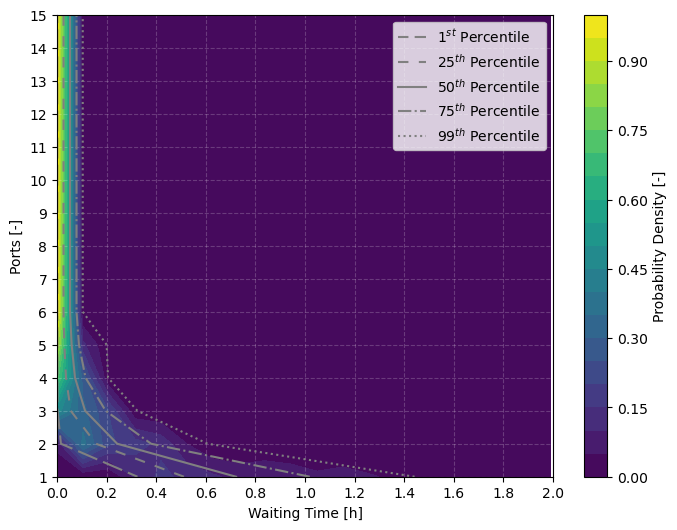

In [274]:
deep_reload(src)

xg, yg = np.meshgrid(bins[:-1] / 3600, servicers, indexing = 'ij')

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

c = ax.contourf(
    xg, yg, waiting_time_hist.T * (bins[1] - bins[0]),
    levels = 21,
    # cmap = src.figures.colormap('ice', reverse = True),
    cmap = src.figures.colormap('viridis', reverse = True),
)

kw = {
    'lw': 1.5,
    'color': 'gray',
}

ax.plot(
    waiting_time_expected[:, 0] / 3600, servicers,
    label = r'$1^{st}$ Percentile', ls = (5, (10, 3)), **kw,
)
ax.plot(
    waiting_time_expected[:, 1] / 3600, servicers,
    label = r'$25^{th}$ Percentile', ls = (0, (5, 5)), **kw,
)

ax.plot(
    waiting_time_expected[:, 2] / 3600, servicers,
    label = r'$50^{th}$ Percentile', ls = '-', **kw,
)

ax.plot(
    waiting_time_expected[:, 3] / 3600, servicers,
    label = r'$75^{th}$ Percentile', ls ='-.', **kw,
)

ax.plot(
    waiting_time_expected[:, 4] / 3600, servicers,
    label = r'$99^{th}$ Percentile', ls = 'dotted', **kw,
)

plt.colorbar(
    ax = ax, mappable = c,
    label = 'Probability Density [-]',
    extend = 'max',
    extendfrac = .5,
)

kw = {
    'xticks': np.linspace(0, 2, 11),
    'yticks': servicers,
    'xlabel': 'Waiting Time [h]',
    'ylabel': 'Ports [-]',
    'xlim': (0, 2),
}

_ = ax.set(**kw)

kw = {
    'ls': 'dashed',
    'color': 'w',
    'alpha': .2,
}

_ = ax.grid(**kw)

_ = ax.legend()

In [5]:
deep_reload(src)

seed = 1468952
seed = None
rng = np.random.default_rng(seed)

servers = 2
server_kw = {
    'rng': rng,
    'service_rate': lambda rng: rng.choice([80]) * 1e3, # [W]
}

servers = [src.queuing.Server(**server_kw) for idx in range(servers)]

demand_kw = {
    'rng': rng,
    'max_length': 5,
    'inter_arrival': lambda rng: rng.exponential(600), # [Bool]
    'capacity': lambda rng: rng.normal(45, 0) * 3.6e6, # [J]
}

demand = src.queuing.Demand(**demand_kw)

system = src.queuing.System(servers, demand)

queue, served, status = system.simulate(steps = 10 * 3600, step = 60)

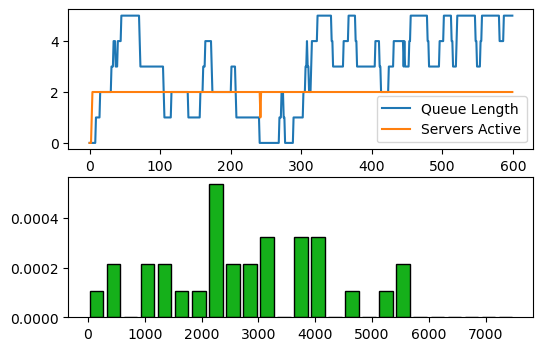

In [6]:
steps = np.array([customer.steps - customer.steps_service for customer in served])

fig, ax = plt.subplots(2, 1, figsize = (6, 4))

ax[0].plot(status['in_queue'], label = 'Queue Length')
ax[0].plot(status['in_service'], label = 'Servers Active')

ax[0].legend()

kw = {
    'rwidth': .8,
    'ec': 'k',
    'fc': 'xkcd:green',
    'bins': list(range(0, 7800, 300)),
    'density': True,
}

_ = ax[1].hist(steps, **kw)

In [7]:
deep_reload(src)

qt = []

for idx in range(100):

    kw = {
        'n': 5,
        'server': {
            'rng': rng,
            'service_rate': lambda rng: rng.choice([80]) * 1e3, # [W]
        },
        'demand': {
            'rng': rng,
            'inter_arrival': lambda rng: rng.exponential(600), # [Bool]
            'capacity': lambda rng: rng.normal(45, 0) * 3.6e6, # [J]
        },
        'simulation': {
            'steps': 10 * 3600,
            'step': 60,
        },
        'histogram': {
            'bins': list(range(0, 3600 * 10, 6)),
        },
    }

    qtd = src.queuing.queuing_time_distribution(**kw)
    qt.extend(list(qtd.rvs(size = 1000)))

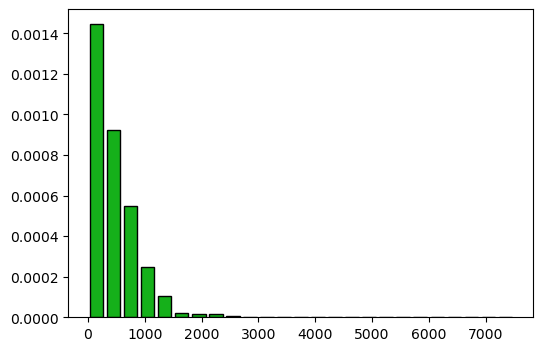

In [8]:
steps = np.array([customer.steps - customer.steps_service for customer in served])

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

kw = {
    'rwidth': .8,
    'ec': 'k',
    'fc': 'xkcd:green',
    'bins': list(range(0, 7800, 300)),
    'density': True,
}

_ = ax.hist(qt, **kw)

In [9]:
qtd.rvs(size = 10)

array([1134.24171086,  116.19367108, 1135.67814675, 1136.74924076,
        774.40550363,  594.12214644,  597.9362728 ,  595.91709934,
       1139.94378847,  777.66662569])

In [10]:
deep_reload(src)

def qt_run(n, m, bins, iterations = 100):

    qt = []
    
    for idx in range(iterations):
    
        kw = {
            'n': n,
            'server': {
                'rng': rng,
                'service_rate': lambda rng: rng.choice([80]) * 1e3, # [W]
            },
            'demand': {
                'rng': rng,
                'max_length': 10,
                'initial': rng.integers(0, n + 1),
                'inter_arrival': lambda rng: rng.exponential(m), # [Bool]
                'capacity': lambda rng: rng.normal(45, 0) * 3.6e6, # [J]
            },
            'simulation': {
                'steps': 10 * 3600,
                'step': 60,
            },
            'histogram': {
                'bins': bins,
            },
        }
    
        qtd = src.queuing.queuing_time_distribution(**kw)
        qt.append(qtd.mean())

    return qt

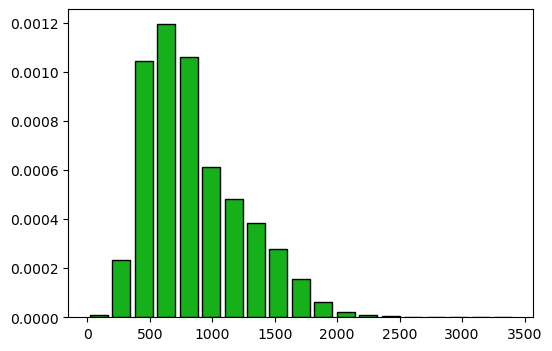

In [19]:
steps = np.array([customer.steps - customer.steps_service for customer in served])

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

kw = {
    'rwidth': .8,
    'ec': 'k',
    'fc': 'xkcd:green',
    'bins': list(range(0, 3600, 180)),
    'density': True,
}

_ = ax.hist(qt_run(4, 600, kw['bins'], iterations = 1000), **kw)

In [426]:
chargers = list(range(1, 15))
inter_arrival = 5
bins = list(range(60, 3600, 300))

values = []

for n in src.progress_bar.ProgressBar(chargers):

    val, _ = np.histogram(qt_run(n, inter_arrival, bins), bins = bins, density = True)
    values.append(val)

 [------------->] (14/14) 100.00%, 3.30 it/s, 4.54 s elapsed, 0.00 s remaining

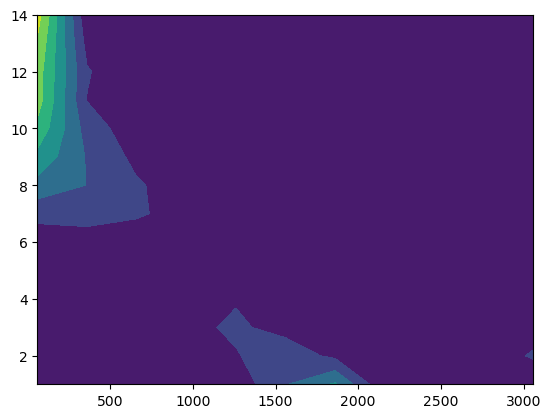

In [427]:
cg, bg = np.meshgrid(chargers, bins[:-1], indexing = 'ij')

plt.contourf(bg, cg, values)

In [425]:
values[0], values[-1]

(array([8.19000000e-05, 5.94666667e-05, 9.04666667e-05, 2.21966667e-04,
        2.84366667e-04, 7.34833333e-04, 8.40866667e-04, 1.47566667e-04,
        2.02433333e-04, 3.16333333e-04, 3.53133333e-04]),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]))

In [446]:
deep_reload(src)

def qt_run(servers, service_time, rho, bins):

    arrival_rate = rho * servers * (1 / service_time)
    print(arrival_rate)

    qt = []
    
    for idx in range(100):
    
        kw = {
            'n': servers,
            'server': {
                'rng': rng,
                'service_rate': lambda rng: 1, # [W]
            },
            'demand': {
                'rng': rng,
                'spawn_criteria': lambda rng: rng.random() <= arrival_rate,
                'capacity': lambda rng: service_time, # [J]
            },
            'simulation': {
                'steps': 1440,
                'step': 1,
            },
            'histogram': {
                'bins': bins,
            },
        }
    
        qtd = src.queuing.queuing_time_distribution(**kw)
        qt.extend(list(qtd.rvs(size = 1000)))

    return qt

0.13333333333333333


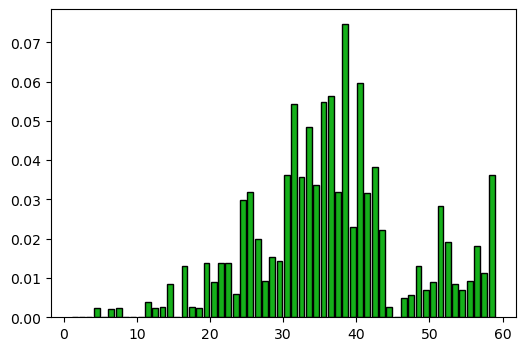

In [447]:
steps = np.array([customer.steps - customer.steps_service for customer in served])

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

kw = {
    'rwidth': .8,
    'ec': 'k',
    'fc': 'xkcd:green',
    'bins': list(range(1, 60, 1)),
    'density': True,
}

_ = ax.hist(qt_run(2, 45, 3, kw['bins']), **kw)